### Defining the problem statement : 

Jamboree education recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Our task is to help the company what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission.

In [59]:
# importing the libraries : 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings("ignore")



In [60]:
df = pd.read_csv(r"C:\Users\mahik\Documents\GitHub\Jamboree-Education-classification\Admission_Predict_Ver1.1.csv")

In [61]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [62]:
df.shape

(500, 9)

Defining the target -->> Chance to Admit 

So, we need to create a model that could give out the probabality of admission given the score of a student.

In [63]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [64]:
df = df.drop(columns=["Serial No."],axis=1)

In [65]:
# Checking the null values and duplicate values  
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [66]:
df.duplicated().sum()
# No null, duplicate values -- looks like the data is already pre-processed.

0

In [67]:
df.columns = df.columns.str.lower()

In [68]:
df.columns = df.columns.str.strip()
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre score          500 non-null    int64  
 1   toefl score        500 non-null    int64  
 2   university rating  500 non-null    int64  
 3   sop                500 non-null    float64
 4   lor                500 non-null    float64
 5   cgpa               500 non-null    float64
 6   research           500 non-null    int64  
 7   chance of admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [70]:
df["university rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: university rating, dtype: int64

In [71]:
df["research"].value_counts()
# The data has already been pre-processed and the features are encoded.

1    280
0    220
Name: research, dtype: int64

In [72]:
df["sop"].value_counts()


4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: sop, dtype: int64

Looking at the size of the data we can understand that the data that's been provided is a sample of entire population.

### Exploratory Data Analysis

In [73]:
# Univariate - Analysis 
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

<AxesSubplot: xlabel='sop', ylabel='count'>

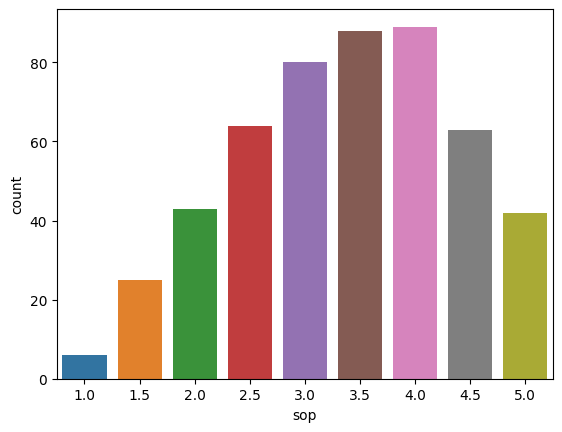

In [74]:
sns.countplot(data=df,x="sop")

In [75]:
df.dtypes

gre score              int64
toefl score            int64
university rating      int64
sop                  float64
lor                  float64
cgpa                 float64
research               int64
chance of admit      float64
dtype: object

<AxesSubplot: ylabel='Density'>

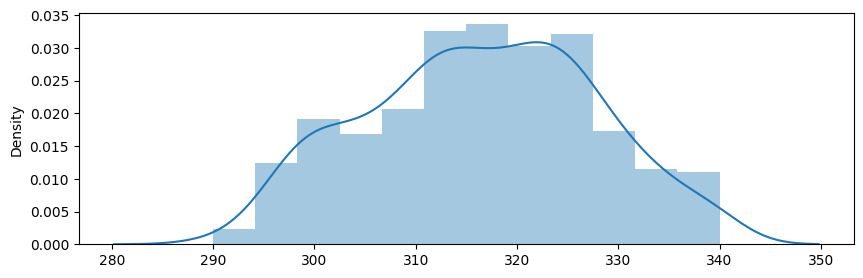

In [76]:
plt.figure(figsize=(10,3))
sns.distplot(x=df["gre score"])

<AxesSubplot: ylabel='Density'>

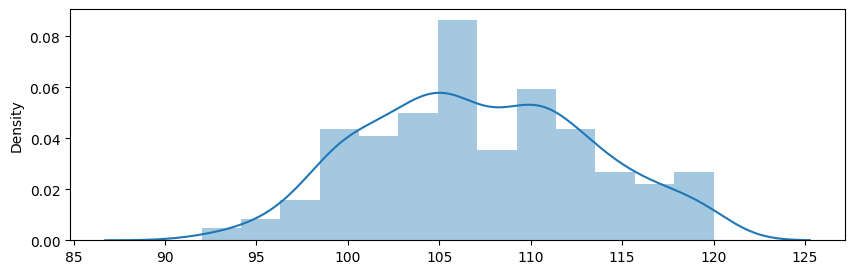

In [77]:
plt.figure(figsize=(10,3))
sns.distplot(x=df["toefl score"])

<AxesSubplot: xlabel='cgpa', ylabel='Density'>

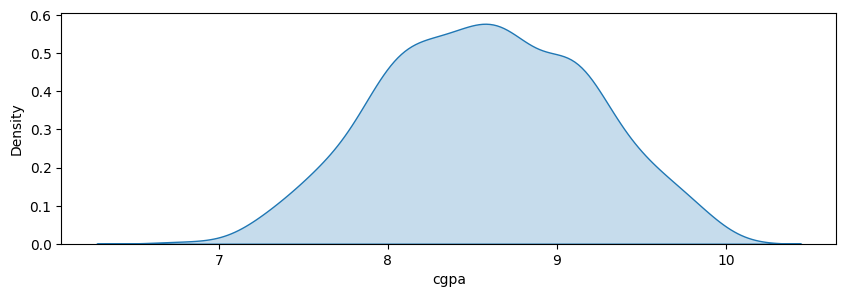

In [78]:
plt.figure(figsize=(10,3))
sns.kdeplot(x=df["cgpa"],shade=True)

We can see that students with varying gre, TOEFL,cgpa scores are applying for foreign universities.

### Let's check the Bi- Variate Analysis

How one features varies with respect to others and their relationship with respect to their chance of getting an admission.

In [79]:
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

<AxesSubplot: xlabel='gre score', ylabel='toefl score'>

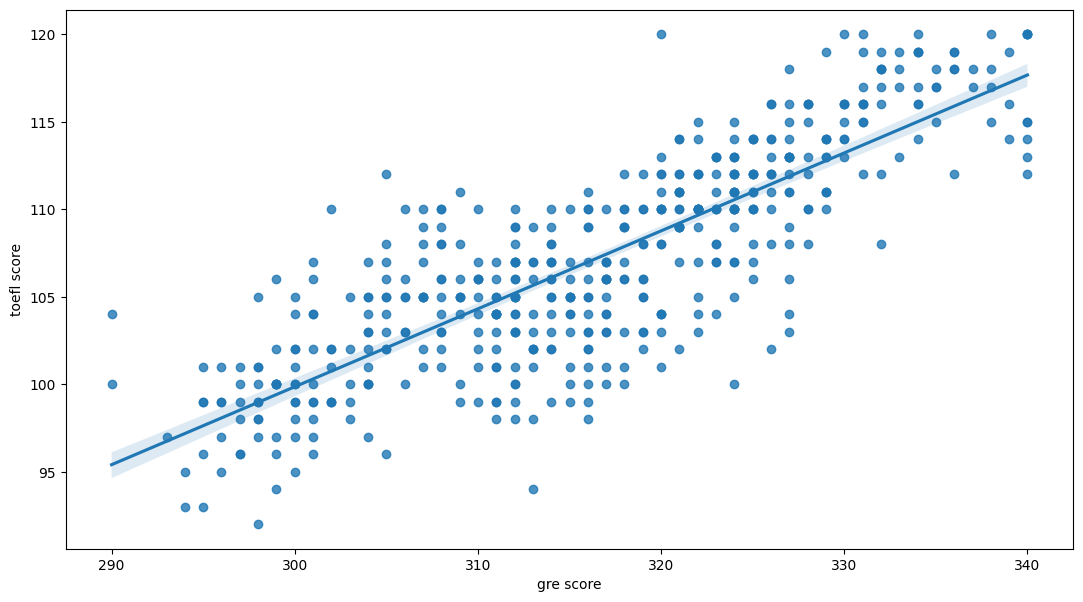

In [80]:
plt.figure(figsize=(13,7))
sns.regplot(data=df,x='gre score',y= 'toefl score')

<AxesSubplot: xlabel='gre score', ylabel='cgpa'>

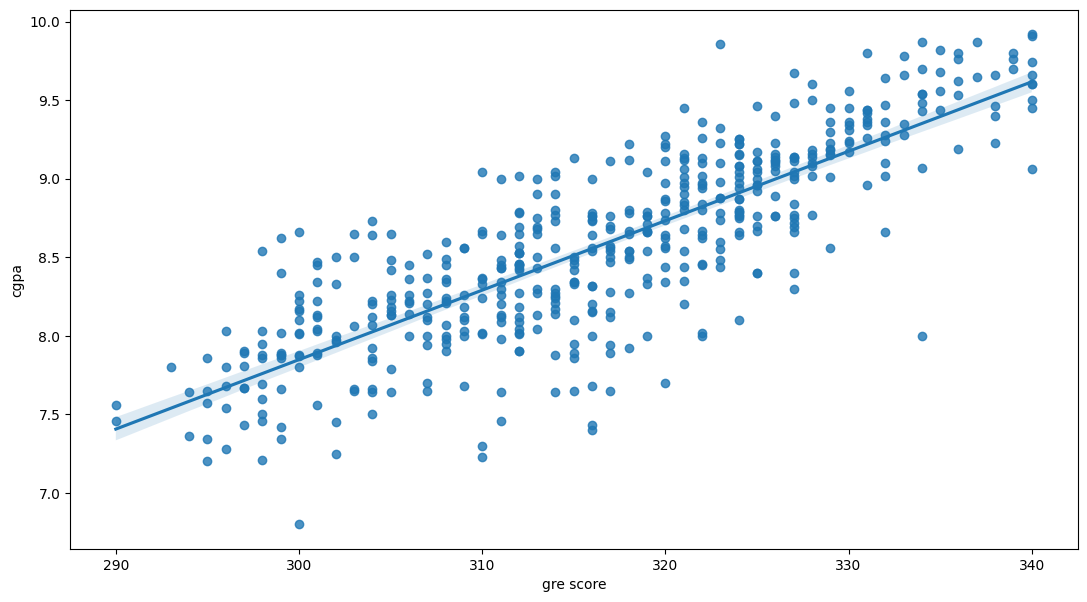

In [81]:
plt.figure(figsize=(13,7))
sns.regplot(data=df,x='gre score',y= 'cgpa')

WE could see a good co-relation between gre_score with TOEFL , cgpa score. 
Let's check with rest of the features.

<Figure size 1000x700 with 0 Axes>

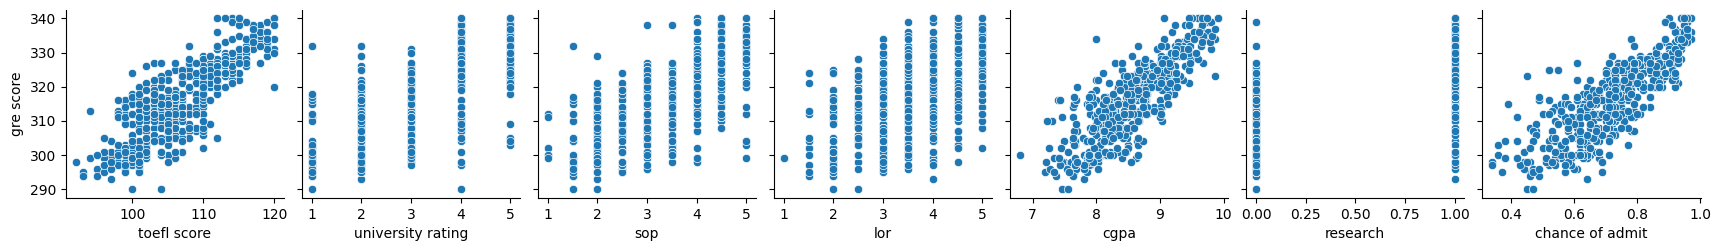

In [82]:
plt.figure(figsize=(10,7))
sns.pairplot(df,y_vars="gre score", x_vars=['toefl score', 'university rating', 'sop', 'lor', 'cgpa','research', 'chance of admit'])
plt.show()
# GRE vs Rest

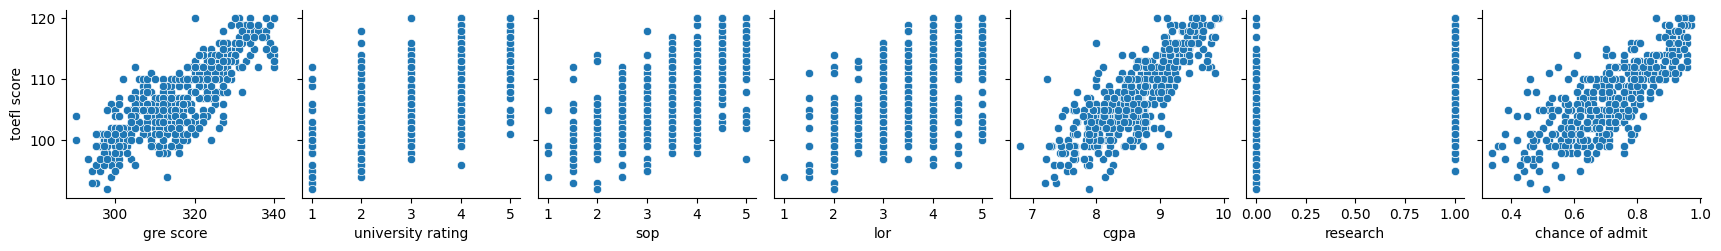

In [83]:
sns.pairplot(df,y_vars="toefl score", x_vars=['gre score', 'university rating', 'sop', 'lor', 'cgpa','research', 'chance of admit'])
# TOEFL vs Rest

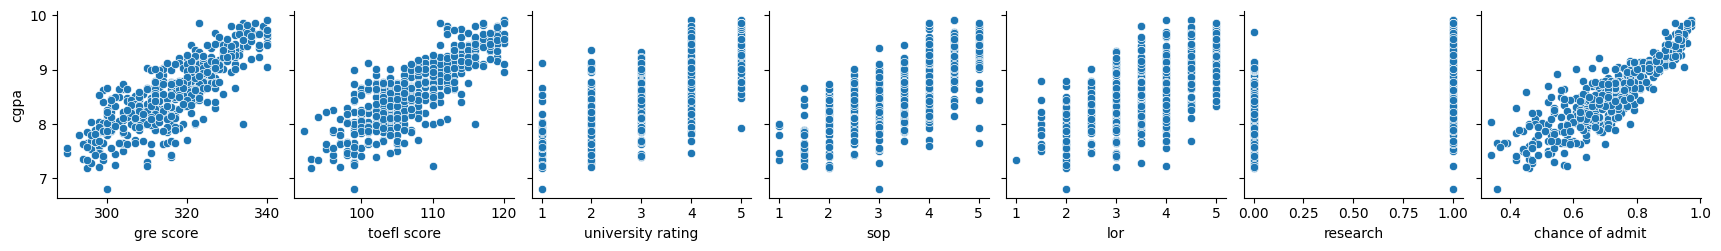

In [84]:
sns.pairplot(df,y_vars="cgpa", x_vars=['gre score','toefl score','university rating', 'sop', 'lor','research', 'chance of admit'])
#cgpa vs rest

- From the above plots we can visually see that gre_score , TOEFL are not only co-related with 
   each other but they are also co-related with "Chance of admit".

- If we look closely we can also see that CGPA is co-related with other features. 

- We can make an assumption that a student with good CGPA having high gre_score , TOEFL score has a higher chance of getting admission in a foreign university.

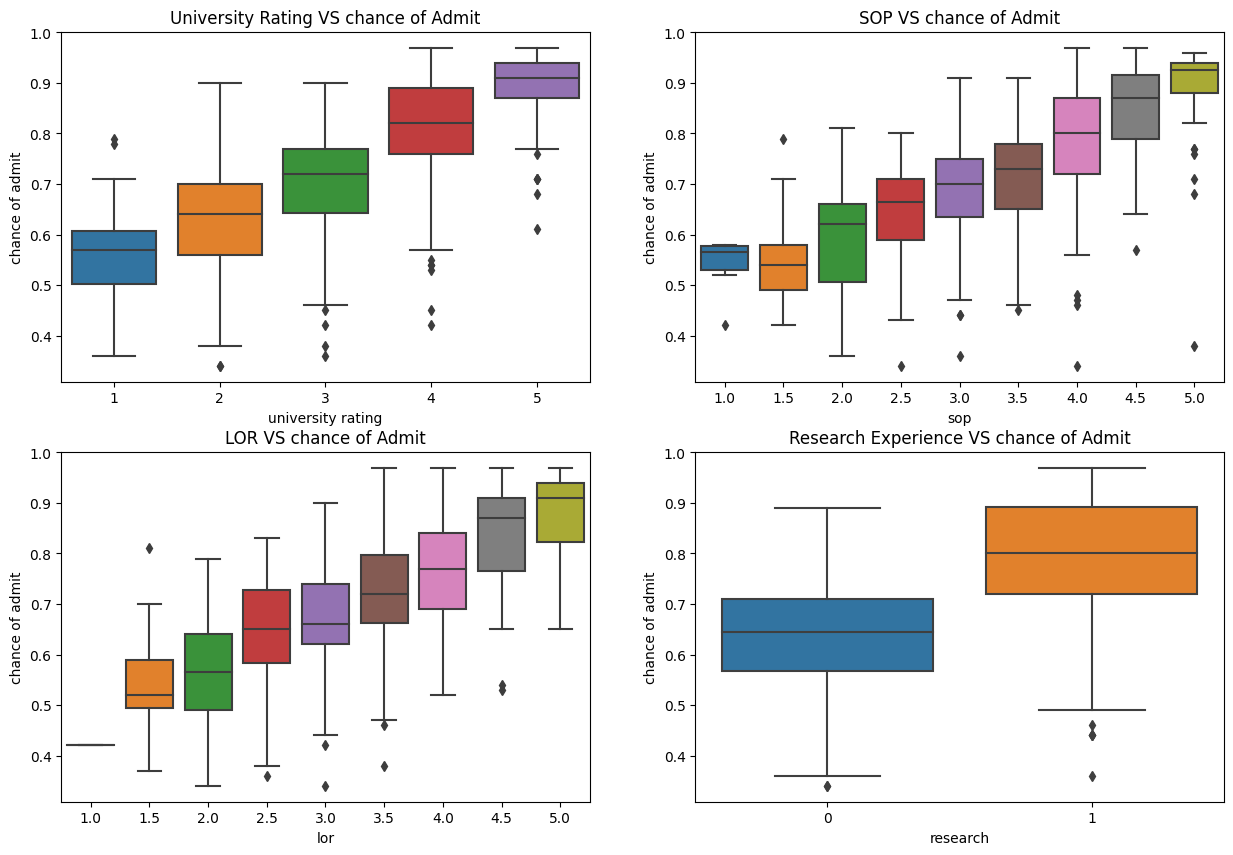

In [85]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, y = "chance of admit", x = "university rating")
plt.title("University Rating VS chance of Admit")

plt.subplot(2,2,2)
sns.boxplot(data = df, y = "chance of admit", x = "sop")
plt.title("SOP VS chance of Admit")

plt.subplot(2,2,3)
sns.boxplot(data = df, y = "chance of admit", x = "lor")
plt.title("LOR VS chance of Admit")

plt.subplot(2,2,4)
sns.boxplot(data = df, y = "chance of admit", x = "research")
plt.title("Research Experience VS chance of Admit")
plt.show()

- From the above an university with a 5 star rating has a chance of admit only if  the median probability is greater than 0.9 and ofcourse few exceptions has been made.

Let's check the co-relation between each variable with a heatmap which uses co-realtion score.

<AxesSubplot: >

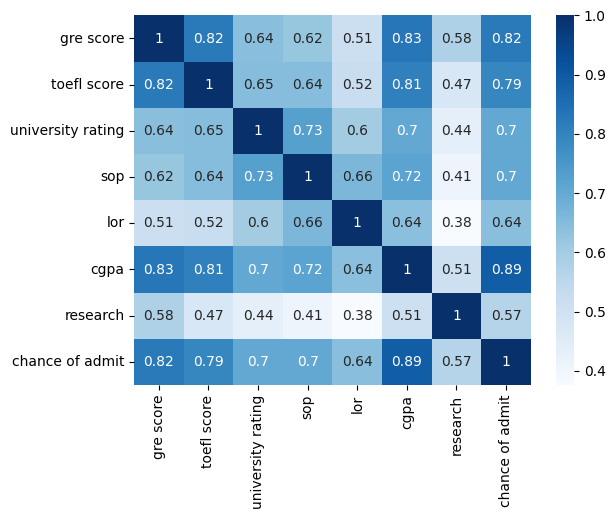

In [86]:
sns.heatmap(df.corr(method="spearman"),annot=True,cmap="Blues")

- We can see that gre_score , toefl , cgpa are not only related with the chance of admit  but they are also co-related with each other.

- This multi-colinearity could be a problem while building a machine learning algorithm as this could mess up the feature importances.

First let's build a simple linear regression model without removing
multi-colinearity and then we will try the same after removing multi-colinearity.

In [87]:
x= df.drop(columns=["chance of admit"],axis = 1)
y = df["chance of admit"]


In [88]:
# train-test-split
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.20,shuffle=True,random_state=42)

In [89]:
# Standardizing the data 
std = StandardScaler()
x_train = pd.DataFrame(std.fit_transform(x_train),columns=x_train.columns)

In [90]:
x_test = pd.DataFrame(std.transform(x_test),columns=x_test.columns)

In [91]:
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import Lasso,Ridge 

In [92]:
from sklearn.metrics import r2_score , mean_squared_error

In [93]:
models = [ 
            ["Linear_regression ",LinearRegression()],
            ["lasso ", Lasso(alpha=0.1)],
            ["ridge ",Ridge(alpha=1.0)]
] 

for model_name , model1 in models:
    model1.fit(x_train,y_train)
    pred = model1.predict(x_test)
    print(model_name,np.sqrt(mean_squared_error(y_test,pred)))

# we can experiment with multiple values of alpha as it is a hyperparameter.

Linear_regression  0.06086588041578313
lasso  0.12242927166741772
ridge  0.060875071776539294


In [94]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model2 = sm.OLS(y_train.values,x_train).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.41e-142
Time:                        17:03:40   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [95]:
# H0 :  Feature weights are not important 
# Ha :  Feature weights are important
# if p < 0.05 reject H0  else accept H0


There are multiple ways to detect multi-colinearity such as finding VIF , p-value etc. From the above we see that p-value for sop is > 0.05 (significance-level), we can assume that sop is insignificant feature.
Let's remove sop and build the model again.

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["features"] = x_train.columns 
vif["vif_value"] = [ variance_inflation_factor(x_train.values ,i) for i in range(x_train.shape[1])]
vif = vif.sort_values(by="vif_value",ascending=False)
vif

,features,vif_value
6,cgpa,4.654540
1,gre score,4.489983
2,toefl score,3.664298
4,sop,2.785764
3,university rating,2.572110
5,lor,1.977698
7,research,1.518065
0,const,1.000000


In [96]:
x_train_update = x_train.drop(columns="sop",axis=1)

In [109]:
x_train_update

,const,gre score,toefl score,university rating,lor,cgpa,research
0,1.0,0.389986,0.602418,-0.098298,0.564984,0.415018,0.895434
1,1.0,-0.066405,0.602418,0.775459,1.651491,-0.067852,-1.116777
2,1.0,-1.253022,-0.876917,-0.098298,-0.521524,-0.134454,-1.116777
3,1.0,-0.248961,-0.055064,-0.972054,0.564984,-0.517420,-1.116777
4,1.0,-0.796631,-0.219435,-0.098298,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.0,1.120212,0.602418,0.775459,1.108237,0.997792,0.895434
396,1.0,-0.979187,-0.383805,-0.972054,-0.521524,-0.600673,0.895434
397,1.0,-1.344300,-1.370029,-1.845810,-1.608031,-2.215790,-1.116777
398,1.0,-0.705353,-0.383805,-0.972054,0.564984,-1.499810,-1.116777


In [97]:
model3 = sm.OLS(y_train.values,x_train_update).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.01e-143
Time:                        17:03:40   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [98]:
# we can also try to remove university rating and check again. 
# However let's check VIF now.

In [107]:
x_train_update_no_const = x_train_update.drop(columns="const",axis=1)
vif = pd.DataFrame()
vif["features"] = x_train_update_no_const.columns 
vif["vif_value"] = [ variance_inflation_factor(x_train_update_no_const.values ,i) for i in range(x_train_update_no_const.shape[1])]
vif = vif.sort_values(by="vif_value",ascending=False)
vif

,features,vif_value
0,gre score,4.485768
4,cgpa,4.478270
1,toefl score,3.616758
2,university rating,2.277656
3,lor,1.802320
5,research,1.517768


Removed the constant that we added during OLS and checked the vif again , we can ever drop features like gre_score , cgpa but the p-values for both these features is < 0.05 and Vif values are in permissable level < 5 and no.of features in the given data are low. Hence, we are not removing them.

In [112]:
x_test = x_test.drop(columns="sop",axis=1)

In [114]:
x_test_update = sm.add_constant(x_test)

In [116]:
y_pred = model3.predict(x_test_update)

Train and test scores are almost equal. i.e : 0.81. We can do hyperparameter tuning with k-fold cross validation and improve the performance of the model.

In [120]:
# Metrics - mean_square_error , r2_score 

print("R-square :", r2_score(y_test,y_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test,y_pred)))


R-square : 0.8188034102531077
mean_squared_error : 0.003705470260323949
RMSE : 0.06087257395842523


In [121]:
# Checking the assumptions of Linear-regression
# This should be done before 

Errors / residuals should be normally distributed

In [158]:
# errors between test and prediction
residuals =y_test.values - y_pred

print("Mean of residuals :", np.mean(residuals))
print(len(residuals))


Mean of residuals : -0.005441700568543884
100


<AxesSubplot: ylabel='Density'>

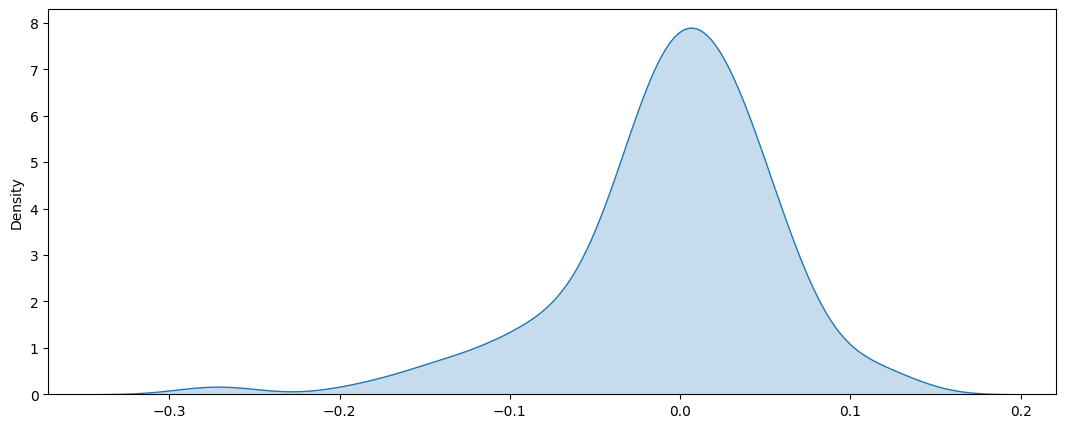

In [159]:
# Plotting the errors 
plt.figure(figsize=(13,5))
sns.kdeplot(x=residuals,fill=True)

Checking for Homoscedasticity : 

Variance of the errors (residuals) should be constant across all levels 

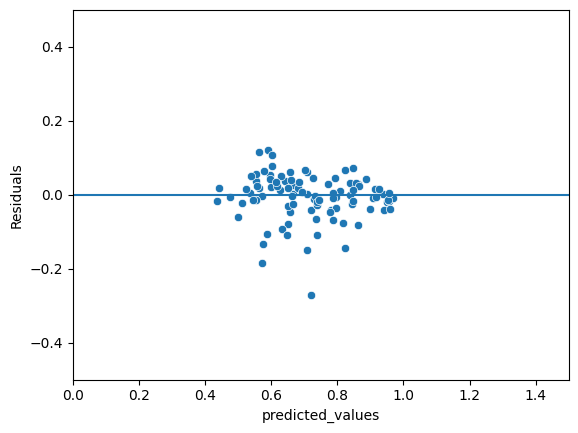

In [160]:
sns.scatterplot(x=y_pred ,y=residuals)
plt.xlabel("predicted_values")
plt.ylabel("Residuals")
plt.xlim(0,1.5)
plt.ylim(-0.5,0.5)
plt.axhline(0,0)
plt.show()


Goldfeld-Quandt homoskedasticity test : 

H0 : errors are homohomoskedastic  --> if p-value < 0.05 reject H0

Ha : errors are not homohomoskedastic.


In [161]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_test_update)
lzip(name, test)

[('F statistic', 0.540895270792884), ('p-value', 0.9765857027224482)]

In the Goldfeld-Quandt test for homoscedasticity, the null hypothesis is that the variances of the errors are constant across different groups or levels of the independent variable. Therefore, a high p-value suggests that you do not reject the null hypothesis, indicating evidence in favor of homoscedasticity.

In our case, with a p-value of 0.97, it is quite high. Typically, a common significance level (alpha) used is 0.05. If our p-value is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis of homoscedasticity.

In [164]:
# help(sms.het_goldfeldquandt)

understanding the spread --> y_test vs y_pred

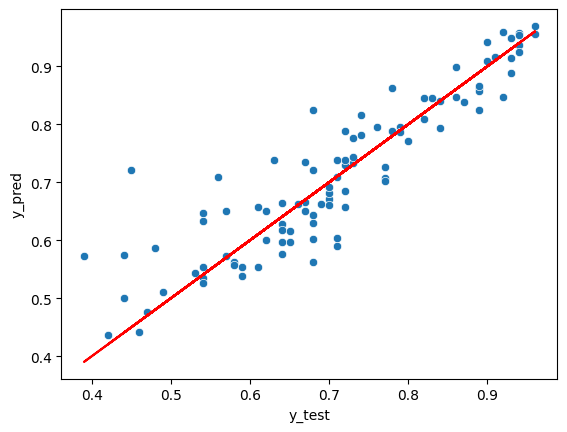

In [170]:
sns.scatterplot(x=y_test.values,y=y_pred)
plt.plot(y_test,y_test,color="red")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


Plotting y_test (our dependent variable) with all the features can't be visulized on 2-d plot , we can plot a partial regressive plot with each dependent variable -->>

Ex : 
 weight * (gre_score) + const

 const is y-intercept 

 weight is params given below

In [ ]:
# fig = plt.figure(figsize=(12,8))

# sm.graphics.plot_regress_exog(model3, 'gre score', fig=fig)

In [175]:
# y-intercept of the line 
model3.params["const"]

0.7241750000000005

In [177]:
# 
model3.params[x_train_update.columns].sort_values(ascending=False)

const                0.724175
cgpa                 0.068031
gre score            0.026601
toefl score          0.018460
lor                  0.016314
research             0.011959
university rating    0.003521
dtype: float64

I tried hyper- parameter tuning using lasso and ridge with different values of alpha but the performance is on par with OLS model.

In [181]:
# HYPERPARAMETER TUNING

# params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
#  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
#  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# ridge = Ridge()

# # cross validation
# folds = 5
# model_cv = GridSearchCV(estimator = ridge,
#                         param_grid = params,
#                         scoring= 'neg_mean_absolute_error',
#                         cv = folds,
#                         return_train_score=True,
#                         verbose = 1)
# model_cv.fit(X_train, y_train)

# cv_results = pd.DataFrame(model_cv.cv_results_)

# cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# # plot
# plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# plt.xlabel('alpha')
# plt.ylabel('Negative Mean Absolute Error')
# plt.title("Negative Mean Absolute Error and alpha")

# Look for alpha where test_score is max and use it to train ridge regression.

# Similarly for Lasso.


### <span style="color:green"> Final obs :

- As per the model CGPA , gre_score plays a major role in the chance of getting admission.

- Student with good CGPA score has Research Experience, with University rating: 5, with Letter of Recommendation rating 5 has the highest probability of Admission.

- For the upcoming students who want an admission in good colleges abroad 

    We would recommend that even if the student neither have a good research experience nor a letter of recommendation it is advisable to have a good CGPA  , gre_scores first.


In [182]:
## Prepared by Mahikshith.